This notebook contains a few exercises to reinforce the concepts covered in Workshop 2.

These exercises are also based around your ability to read and interact with documentation. Please refer to the Workshop_2 notebook, the following links, and Google (or Bing/DuckDuckGo/Ecosia if that's what you prefer):
- [Matplotlib Documentation Page](https://matplotlib.org/stable/users/explain/quick_start.html)
- [Pandas Documentation Page](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [Xarray Documentation Page](https://docs.xarray.dev/en/stable/user-guide/index.html)
- [Cartopy Documentation Page](https://scitools.org.uk/cartopy/docs/latest/getting_started/index.html)

There are also links to more specific documentation pages sprinkled throughout the notebook

In [1]:
###### IMPORTS GO HERE ######
# Standard Libraries #
import datetime as dt # Helps us handle dates
# Public Libraries #
import matplotlib.pyplot as plt # Gives us more advanced plotting functionality
import pandas as pd # Extends data analysis capabilities
import numpy as np # Extends data analysis/math capabilities
import xarray as xr # Extends data analysis capabilities
import cartopy.crs as ccrs # This lets us easily work with map projections
import cartopy.feature as cfeature # This adds political/geographic features to maps

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


We are first going to practice making a few simple plots. We are then going to look at data stored in a Pandas Dataframe and then data stored in an XArray Dataset.

Below is some code that makes an empty single panel plot as well as five different numpy arrays, one is a list of X-values and then four containing Y-values. Plot all four lines on the empty plot.

In [3]:
# Make the numpy arrays
# Make the X-values
x_values = np.arange(0,10,.1)
# Make various Y-values
y_values1 = 4 * x_values - 3
y_values2 = 6*np.sin(x_values*np.pi) + 15
y_values3 = 10*np.sqrt(x_values)
y_values4 = y_values1[::-1]

# Make the empty plot for the y_values to be plotted on
# and then plot all four lines on the plot




The plot that we made has multi-colored lines on it with little to no explanation of what's going on. Copy and paste your code into the cell below and add to the plot the following features:

- An X-label of "X-Values"
- A Y-label of "Y-Values"
- A legend that lists all four lines
- A title of "Four Random Lines"

The next thing we're going to do is change two of the lines to be scatter plot points instead of lines, we do this using the .scatter() method. Please switch any two of the lines to be scatter plots instead

Having four lines on the same plot looks kind of busy. Let's separate this into two subplots within the same figure. Below is some code to get you started. You should plot the lines that use .plot() on one subplot, and the lines that use .scatter() on the other. Both subplots should be have the same X and Y labels as well as legends

The final thing we are going to do with matplotlib is plot data onto a map of the globe. The cell below generates some random temperature data on a lat,lon grid. Plot this data onto a map of the globe using the .contourf() function from matplotlib and the PlateCarree() map projection from cartopy. You should also add the coastlines to the plot so there is geographic context for the values we're plotting.

Your levels should have a spacing of 2 degrees.

[Here is the documentation for .contourf()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html)

[Here is the documentation for map projections in cartopy](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)

[Here are examples of applying map projections to matplotlib plots](https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html)

I also recommend changing the colorbar off of the default Viridis. [You can look at a list of matplotlib colorbar options here.](https://matplotlib.org/stable/users/explain/colors/colormaps.html) You do this using the keyword cmap='insert colorbar name' in your .contourf() function call. Feel free to experiment with different colorbars and get a feel for how they look and how choice of colorbar modifies the presentation of the data.

In [4]:
# This cell generates some random temperature data on a lat-lon grid
# Just run the cell and don't change any of its contents.
# First make the lat/lons
ex_lons = np.linspace(-179.5,179.5,360)
ex_lats = np.linspace(-89.5,89.5,180)
# Make a meshgrid
ex_lons_mg,ex_lats_mg = np.meshgrid(ex_lons,ex_lats)
# Make an empty array to eventually fill with the temperature data
ex_temps = np.empty(ex_lons_mg.shape)
# Let's make this be during fall or spring so hemispheres are roughly equal
# Believe it or not the line below isn't actually a bad
ex_temps[:,:] = 30 * np.cos(np.deg2rad(ex_lats_mg))
# Let's add some horizontal variations
ex_temps[-90:,:] += np.random.normal(0,4,360)
ex_temps[:-90,:] += np.random.normal(0,4,360)
# Add in some hotspots/coldspots in each hemisphere
ex_temps[33:55,68:180] += 6
ex_temps[-29:,200:] += 4
ex_temps[77:100,120:300] -= 4
ex_temps[-55:-40,220:260] -= 2
# Shove down the temp at the poles to more reasonable temps
ex_temps[:16,:] -= 30
ex_temps[-16:,:] -= 20
# Now smooth this out because otherwise it'll look ridiculous
from scipy.ndimage import gaussian_filter # This is just a tool to smooth data with
ex_temps = gaussian_filter(ex_temps,sigma = 7)

Make your plot of the ex_temps array in the codeblock below this cell.

Matplotlib and Cartopy assume PlateCarree() as a default map projection. If we want to plot data such as this on a different map projection we have to transform the data. 

Here are some projections to try:

- Mollweide
- Mercator
- Robinson
- Sinusoidal

Pick a map projection you want to test out from the list above. Then add to your .contourf() function call the keyword transform=ccrs.PlateCarree() this will enable you to plot the data on the new map projection. Delete this keyword to see the impact of not having it and how it ruins your plot.

Now we're going to practice with Pandas some more. The code below generates a dataframe with synthetic temperature, and wind data meant to simulate conditions here in Fort Collins throughout the year.

The temperature data is in degrees Celsius, and the windspeed is in meters per second.

In [5]:
# This cell generates the random data to go into the dataframe
# The values it generates closely approximate the climatology here in Fort Collins

# This line just ensures everyone's randomly generated data is the same
# If you change the value inside it you will get a very different dataframe from everyone else
np.random.seed(24238)

# Make dates for everyday from 2015 to 2020
fc_df_dates = np.array([dt.datetime(2015,1,1,12) + dt.timedelta(days = i) for i in range(2192)])

# Generate and smooth the temperature data so there is a synoptic + seasonal signal
fc_df_temps = gaussian_filter(np.array([-25*np.cos((x/58.4))+12 + np.random.normal(0,3,1) for x in range(2192)]),sigma = 1)

# Make the winds random
fc_df_winds = np.random.uniform(0,1,2192)*9

# Add directions to the wind via angles
fc_df_wind_dir = np.random.randint(0,360,2192)

# Make the actual dataframe
fc_df = pd.DataFrame.from_dict({'dates':fc_df_dates[:],'temp':fc_df_temps[:,0],'wind_speed':fc_df_winds[:],'wind_direction':fc_df_wind_dir},)

Examine the dataframe the first few rows of the dataframe in the cell below to get a sense of how it is arranged.

Below is a function that takes the wind angles we in the data frame and converts them to strings that signify the direction of the wind. Use this function to add a new column to our dataframe called 'wind_direction_str'

In [6]:
def calculate_wind_direction(wind_angles:pd.Series) -> pd.Series:
    '''
        Given a Pandas Series of wind direction as an angle (0-360) this function calculates
        the direction of the winds and generates an equivalently long Pandas Series filled
        with strings indicating the wind_direction. The strings are only for the four
        cardinal directions 'N', 'S', 'E', 'W'

        Parameters:
            wind_angles (pd.Series): The wind angles we want to convert into strings.
        
        Outputs:
            conv_wind_angles (pd.Series): A pandas series of the converted wind directions
    '''

    # Create an empty numpy array to hold our data
    conv_wind_angles = np.empty((len(wind_angles)),dtype = str)

    # if/else control flow to convert angle into a string
    for i in range(len(wind_angles)):
        if wind_angles[i] >= 315 or wind_angles[i] <= 45:
            conv_wind_angles[i] = 'N'
        elif wind_angles[i] >= 45 and wind_angles[i] <= 135:
            conv_wind_angles[i] = 'E'
        elif wind_angles[i] >= 135 and wind_angles[i] <= 225:
            conv_wind_angles[i] = 'S'
        elif wind_angles[i] >= 225 and wind_angles[i] <= 315:
            conv_wind_angles[i] = 'W'
        else:
            conv_wind_angles[i] = 'NAN'

    #convert to a pandas series and return the results of our conversion
    return pd.Series(conv_wind_angles)

In [8]:
# Create your new column in this cell



One of the pandas methods we learned about in the workshop was .describe(), the functionality of .describe() can actually be extended based on certain groupings within the data.

The .groupby() method allows us to group data within a pandas array based on some characteristic. One of the columns of our dataframe is great for grouping data by, 'wind_direction_str'

[Here is the documentation for groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

Select the temp and wind_direction_str columns from the data-frame, call groupby on the wind_direction_str column and then call .describe() on the groupy results. You end result should be statistics for temperature based on the direction of the wind. 

Below is an example where I do a similar grouping on the month of the year.

In [9]:
fc_df[['temp']].groupby(fc_df['dates'].dt.month).describe()

temp                                                                   \
       count       mean       std        min        25%        50%        75%   
dates                                                                           
1      186.0 -12.539833  2.029874 -16.925412 -14.000005 -12.443447 -11.017546   
2      170.0  -7.155033  2.943996 -13.672570  -9.119156  -7.264645  -4.904726   
3      186.0   3.023223  4.073823  -6.697672  -0.001676   2.779027   6.223991   
4      180.0  15.750411  4.145452   6.040479  12.623617  16.058914  18.694778   
5      186.0  27.362272  3.494356  20.394835  24.513964  27.256103  30.159866   
6      180.0  34.928314  2.234326  28.409000  33.502857  35.356683  36.491675   
7      186.0  36.519516  1.863096  30.232249  35.396654  36.653188  37.675750   
8      186.0  31.738106  3.151911  23.912266  29.461426  31.933212  34.192002   
9      180.0  20.682579  3.947712  13.051627  17.810431  20.518401  24.228427   
10     186.0   8.121683  4.316762  -1.320957   4.814622   8.146614  11.223065   
11     180.0  -3.470597  3.603666 -10.321784  -6.333154  -4.088758  -0.447015   
12     186.0 -11.080899  2.398891 -15.765661 -12.682698 -11.427470  -9.550956   

                  
             max  
dates             
1      -7.722999  
2       1.701017  
3      13.505389  
4      25.459054  
5      35.876766  
6      39.771753  
7      40.886698  
8      38.100770  
9      29.700172  
10     19.520262  
11      3.891730  
12     -4.760635

Do your grouping in the cell below, then look at the data. Which direction tends to be the coldest and which one tends to be the warmest?

Another feature of pandas that we didn't fully explore in the earlier workshop is the ability to sort columns by other columns. [Here is the documentation for pandas .sort_values() function.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

Review the documentation and then sort the data frame by the temperature values, and report the first and last few rows using .head() and .tail(). How does Pandas sort the values? What did this do to the index (the leftmost column)?

Now let's practice with querying the data. Let's pretend that the list below was given to you by your adviser as pieces of information they would like to learn about our simple dataset. Using the .query() method we learned about in the workshop try and extract that information. Remember that you can call other pandas methods such as .mean() on the results of .query().

When trying to call .query() with data that is stored as a string you need to wrap the value you're trying to call in either a single-quote or double-quote still, but you cannot use whichever type of quote you used to define your string.

List of things to query:
- How many days where there where the wind was coming out of the North and mean daily temperature was less than -10 Celsius?
- How many days did the wind come out of the North-East direction (between 30 and 60 degrees)?
- What is the mean wind-speed and direction when temperatures are above 30 degrees Celsius?
- What is the date of the hottest day when the wind was coming out of the West? (You may need to use a different method to help you sort the data).

Write down the answers to the queries as comments in your notebook.

This is only the absolute basics of pandas. Here is a link to some documentation and resources for how to use pandas and official tutorials for it. These are just resources I am placing here for your future reference.

[Pandas Documentation](https://pandas.pydata.org/docs/reference/index.html)

[Pandas Getting Started Tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html#min-tut-09-timeseries)

[A short course on Pandas from Kaggle](https://www.kaggle.com/learn/pandas)



Now let's get some practice in with XArray. This line loads in a dataset of Sea Surface Temperatures (SSTs) from NOAA’s Extended Reconstructed Sea Surface Temperature (ERSSTv5) monthly averages. After you load in the dataframe examine the dataframe as a whole and the 'sst' variable specifically.

In [10]:
xarray_example_ds = xr.tutorial.load_dataset('ersstv5')

Examine the dataset in the cell below and look at how the SST variable is set up in relation to the dimensions of the file.

Now that we've looked at the data let's dig into the SST data in more detail. Group the SST data by season, take the median and save it as its own variable called seasonal_grouping_median, then do the same thing but for the mean of the SST grouped by season, call this variable seasonal_grouping_mean

Make plots of either the mean or median seasonal SSTs in the cell below smilar to what we did in the workshop, this is to give us a sense of what the data looks like.

Something that we commonly have to do in atmospheric science is calculate anomalies. Anomalies allow us to see how much data has deviated from the norm and removes things such as the seasonal cycle which could complicate analysis. We're going to work through calculating SST anomalies on the ERSSTv5 dataset.

To do this we want to substract either the mean or median sst from the grouped by season dataset as a whole, save this as a variable called seasonal_anomalies.

Now we're going to plot our seasonal anomalies using matplotlib. Below is some code to get you started making the plot. Plot the data using .contourf(), add a colorbar with a horizontal orientation.

Try plotting the following:

    - The mean of the anomalies for all months
    - The anomalies for a specific month

Why do the plots differ so wildly?

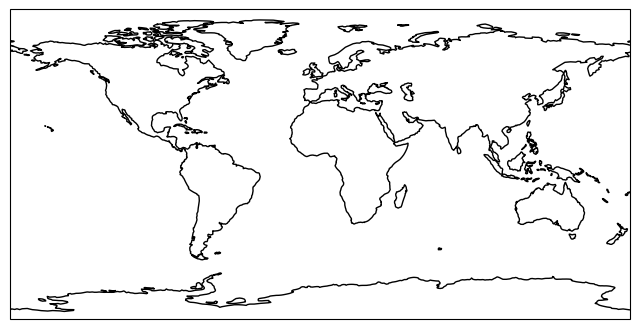

In [12]:
# UNCOMMENT THE LINE BELOW AFTER YOU'VE MADE YOUR seasonal_anomalies VARIABLE
# sst_seasonal_anoms = np.array(seasonal_anomalies.sst)
fig,ax = plt.subplots(1,1,figsize = (8,5),subplot_kw={'projection':ccrs.PlateCarree()})
ax.coastlines()

plt.show()